In [1]:
import numpy as np
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [3]:
data = pd.read_csv("data/book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [6]:
data['reviewText_clean'] = data['reviewText'].str.lower()

In [7]:
data['reviewText_clean'] = data.apply(lambda a: re.sub(r"[^\w\s]",'',a['reviewText_clean']), axis=1)

In [8]:
data['reviewText_clean'][0]

'clean and funny a bit busy with all the different plots going on but overall a good read bye now'

In [9]:
vader_sentiment = SentimentIntensityAnalyzer()

In [11]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda a: vader_sentiment.polarity_scores(a)['compound'])
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [12]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

In [13]:
data['vader_sentiment_labels'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_labels
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment_labels'>

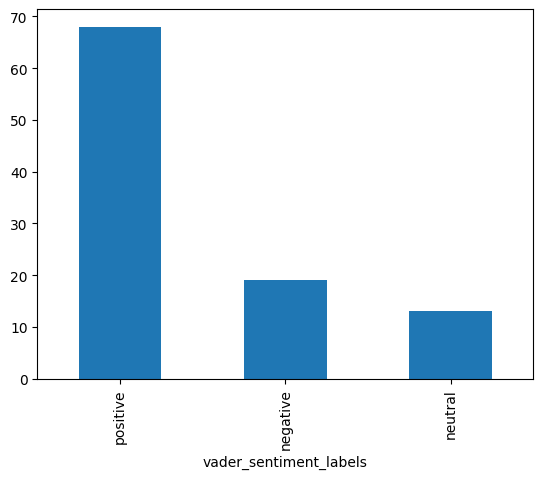

In [14]:
data['vader_sentiment_labels'].value_counts().plot.bar()

## with pretained models

In [16]:
sentiment_pipeline = pipeline('sentiment-analysis')
transformer_labels = []
for review in data['reviewText_clean'].values:
    sentiment_list = sentiment_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
data['transformer_sentiment_labels'] = transformer_labels

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


<Axes: xlabel='transformer_sentiment_labels'>

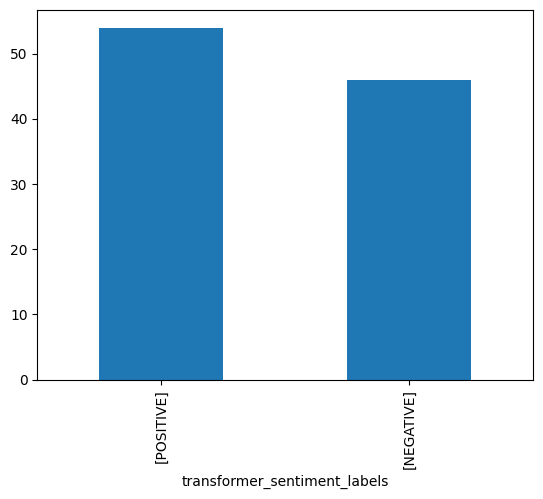

In [17]:
data['transformer_sentiment_labels'].value_counts().plot.bar()

In [18]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_labels,transformer_sentiment_labels
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,[NEGATIVE]
